In [2]:
#1. From the Train data Check on how much null data there are 
#2. From the Train data check on the surviving rate
#3. Get the age of the people in the titanic

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

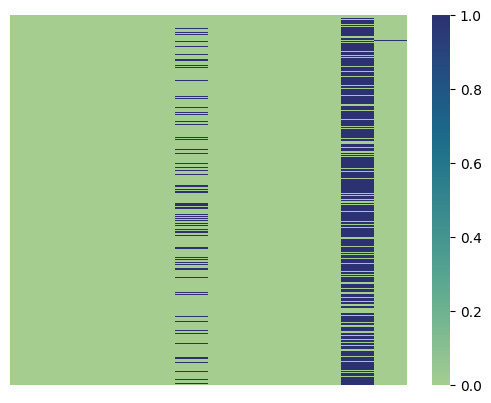

In [11]:
sns.heatmap(data = train.isnull(), xticklabels=False ,yticklabels=False, cmap = 'crest')

<Axes: xlabel='Pclass', ylabel='Age'>

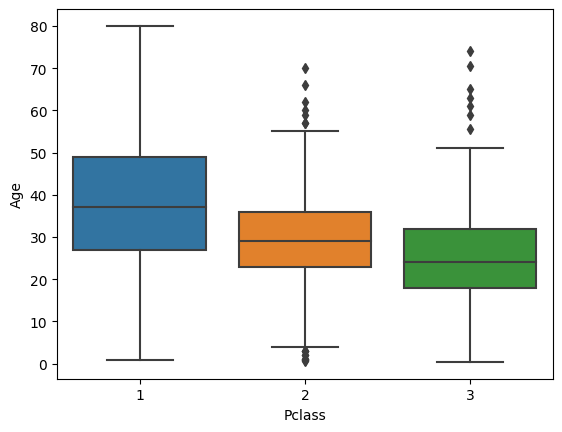

In [12]:
sns.boxplot(data = train , x = 'Pclass', y = 'Age')

In [16]:
def impute(var01):
    Age = var01['Age']
    Pclass = var01['Pclass']
    if pd.isnull(Age):
        if var01[1] == 1:
            return 37
        elif var01[1] == 2:
            return 29
        elif var01[1] == 3:
            return 24
    else
        return Age


In [23]:
# impute the age that is null
train['Age'] = train[['Age','Pclass']].apply(impute,axis = 1)

<Axes: >

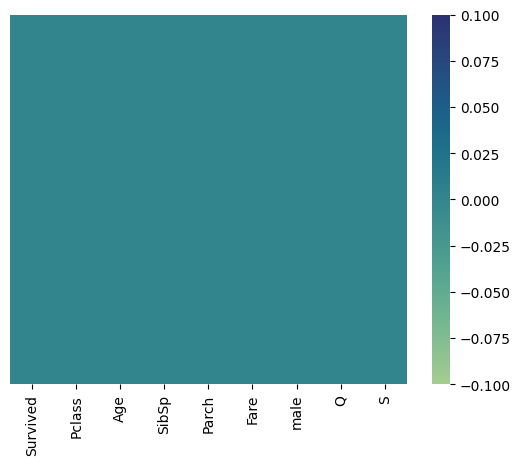

In [46]:
sns.heatmap(data = train.isnull(), xticklabels=True ,yticklabels=False, cmap = 'crest')

In [27]:
train.drop('Cabin', inplace = True, axis = 1 )

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [30]:
train.drop('PassengerId', inplace = True, axis = 1 )

In [31]:
train.drop('Name',inplace = True, axis = 1 )

In [32]:
train.drop('Ticket',inplace = True, axis = 1 )

In [35]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [36]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [39]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [40]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [41]:
train = pd.concat([train,sex,embark],axis=1)

In [44]:
train.drop(['Sex','Embarked'],inplace = True, axis = 1)

In [45]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24,1,0,7.2500,True,False,True
1,1,1,37,1,0,71.2833,False,False,False
2,1,3,24,0,0,7.9250,False,False,True
3,1,1,37,1,0,53.1000,False,False,True
4,0,3,24,0,0,8.0500,True,False,True


In [47]:
from sklearn.model_selection import cross_validate

In [48]:
from sklearn.model_selection import train_test_split

In [53]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [55]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [57]:
# Create a model
from sklearn.linear_model import LogisticRegression

In [58]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\kaminogo.kenji\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred = logmodel.predict(X_test)

In [61]:
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       169
           1       0.80      0.67      0.73       126

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.78       295



In [66]:
print(confusion_matrix(y_test,pred))

[[148  21]
 [ 42  84]]
